In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [103]:
df=pd.read_excel('flower price.xls')

### 資料連結:https://amis.afa.gov.tw/flower/FlowerMarketDayPriceVolumeCP.aspx

In [104]:
df

,花卉 市場日價量比較,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,交易日期：,108/01/01 ~ 108/04/10 (農曆:107/11/26 ~ 108/03/06),NaN,NaN,NaN,NaN
1,市 場：,台北花市,NaN,NaN,NaN,NaN
2,日 期,市 場,交易量(把),平均價(元/把),交易金額(元),殘貨量(把)
3,108/01/01,105 台北花市,46212,42.7965,1.97771e+06,2383
4,108/01/02,105 台北花市,58082,52.5673,3.05321e+06,1119
5,108/01/03,105 台北花市,83817,49.844,4.17777e+06,2432
6,108/01/04,105 台北花市,87618,48.1563,4.21936e+06,3999
7,108/01/05,105 台北花市,72793,48.6831,3.54379e+06,2183
8,108/01/07,105 台北花市,87633,52.1981,4.57428e+06,3555
9,108/01/08,105 台北花市,64220,46.2072,2.96742e+06,1940


### 資料整理

In [105]:
colnames=df.loc[2].values
df=df[3:]
df.columns=colnames

In [106]:
df.index = range(1, 83)

In [107]:
df.drop(['殘貨量(把)','市　　場','交易金額(元)'],axis=1,inplace=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [123]:
df.head()

,日 期,交易量(把),平均價(元/把)
1,108/01/01,46212,42.7965
2,108/01/02,58082,52.5673
3,108/01/03,83817,49.844
4,108/01/04,87618,48.1563
5,108/01/05,72793,48.6831


In [129]:
x = np.array(df['交易量(把)'])
y = np.array(df['平均價(元/把)'])

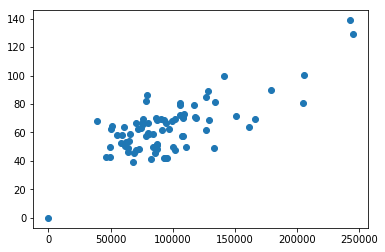

In [130]:
plt.scatter(x, y)

In [131]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
X=x.reshape(len(x),1)
Y=y.reshape(len(y),1)

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=555)

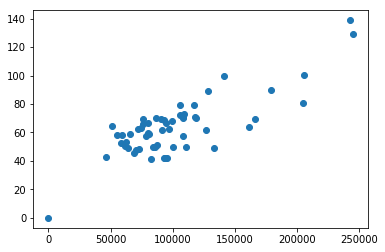

In [133]:
plt.scatter(x_train,y_train)

In [134]:
regr.fit(x_train,y_train)
Y_pred=regr.predict(x_test)

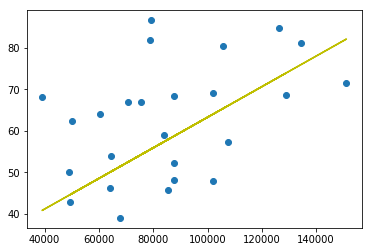

In [140]:
plt.scatter(x_test, y_test)
plt.plot(x_test, Y_pred, 'y')

### 成交量與平均價線性相關不高

In [141]:
regr.score(x_test, y_test)

-0.03557770482380063